# Experiments with the diffusion equation

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

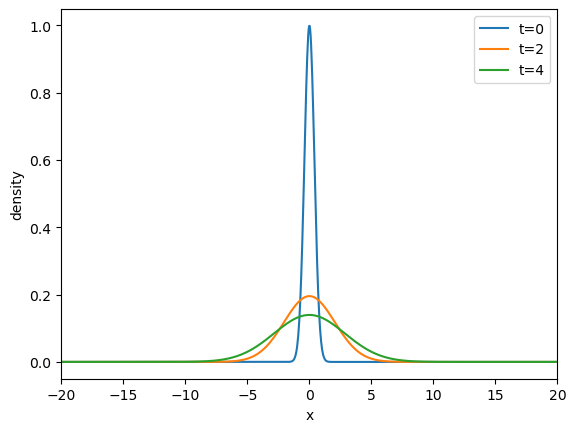

1.0
1.0
0.9999999999974705


In [17]:
def diffusion(x, t, D, V, H_0):
    w_0 = (V**2)/(2*np.pi*H_0**2)
    S = (2*np.pi*H_0**2)/V
    w = np.sqrt(w_0 + 2*D*t)

    return ((S*w_0)/(w*np.sqrt(2*np.pi)))*np.exp(-(x**2)/(2*w**2))

x = np.linspace(-20, 20, 1000)
y_0 = diffusion(x, 0, 1, 1, 1)
y_2 = diffusion(x, 2, 1, 1, 1)
y_4 = diffusion(x, 4, 1, 1, 1)

plt.plot(x, y_0, label='t=0')
plt.plot(x, y_2, label='t=2')
plt.plot(x, y_4, label='t=4')
plt.xlabel('x')
plt.ylabel('density')
plt.xlim(-20, 20)
plt.legend()
plt.show()

print(np.trapz(y_0, x))
print(np.trapz(y_2, x))
print(np.trapz(y_4, x))

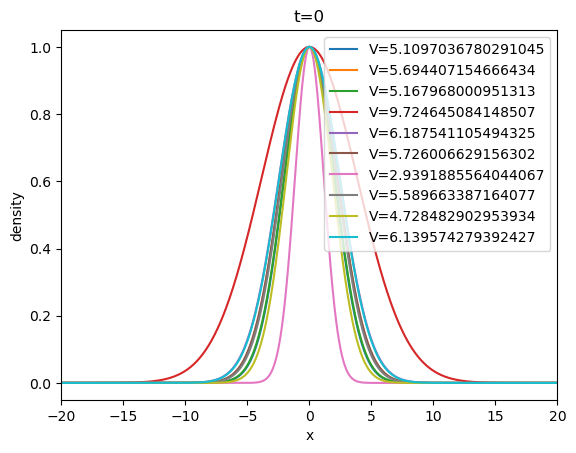

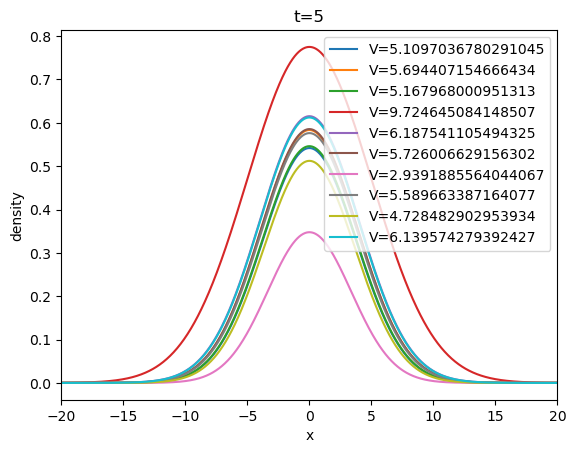

In [15]:
n_features = 1000
n_targets = n_features

x = np.linspace(-20, 20, n_features)


# displaying the first 10 samples of x_train
rng = np.random.default_rng(seed=99)
V_arr = rng.uniform(0.1, 10, 10)

plt.figure()
for V in V_arr:
    y_0 = diffusion(x = x, t = 0, D = 1, V = V, H_0 = 1)
    plt.plot(x, y_0, label=f'V={V}')
plt.xlabel('x')
plt.ylabel('density')
plt.title('t=0')
plt.xlim(-20, 20)
plt.legend()
plt.show()

# displaying the first 10 samples of y_train

plt.figure()
for V in V_arr:
    y_0 = diffusion(x = x, t = 5, D = 1, V = V, H_0 = 1)
    plt.plot(x, y_0, label=f'V={V}')
plt.xlabel('x')
plt.ylabel('density')
plt.title('t=5')
plt.xlim(-20, 20)
plt.legend()
plt.show()


In [19]:
# compile x_train and y_train. shapes are (n_samples, n_features) and (n_samples, n_targets) respectively

n_samples_train = 100
x_train = np.zeros((n_samples_train, n_features))
y_train = np.zeros((n_samples_train, n_targets))

rng = np.random.default_rng(seed=99)
V_arr_train = rng.uniform(0.1, 10, n_samples_train)

for i in range(n_samples_train):
    x_train[i, :] = diffusion(x = x, t = 0, D = 1, V = V_arr_train[i], H_0 = 1)
    y_train[i, :] = diffusion(x = x, t = 5, D = 1, V = V_arr_train[i], H_0 = 1)

n_samples_test = 10
x_test = np.zeros((n_samples_test, n_features))
y_test = np.zeros((n_samples_test, n_targets))

rng = np.random.default_rng(seed=98)
V_arr_test = rng.uniform(0.1, 10, n_samples_test)

for i in range(n_samples_test):
    x_test[i, :] = diffusion(x = x, t = 0, D = 1, V = V_arr_test[i], H_0 = 1)
    y_test[i, :] = diffusion(x = x, t = 5, D = 1, V = V_arr_test[i], H_0 = 1)

Text(0.5, 1.0, 'y_train')

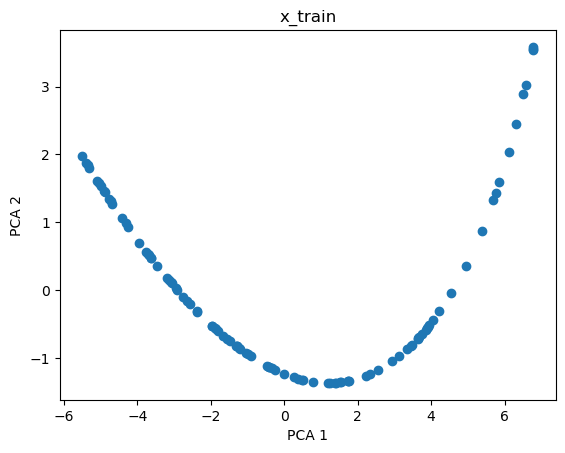

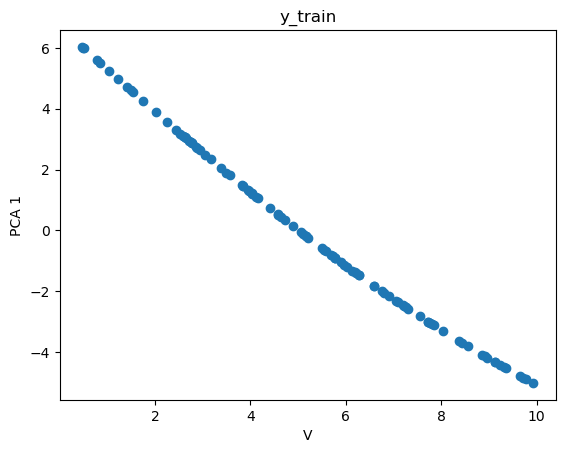

In [26]:
from sklearn.decomposition import PCA

PCA_model_x_train = PCA(n_components=2)
x_train_2d = PCA_model_x_train.fit_transform(x_train)

plt.figure()
plt.scatter(x_train_2d[:, 0], x_train_2d[:, 1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('x_train')

PCA_model_y_train = PCA(n_components=1)
y_train_1d = PCA_model_y_train.fit_transform(y_train)

plt.figure()
plt.scatter(V_arr, y_train_1d[:, 0])
plt.xlabel('V')
plt.ylabel('PCA 1')
plt.title('y_train')

# each dot represents a sample scenario with a different V value

Text(0, 0.5, 'PCA 1')

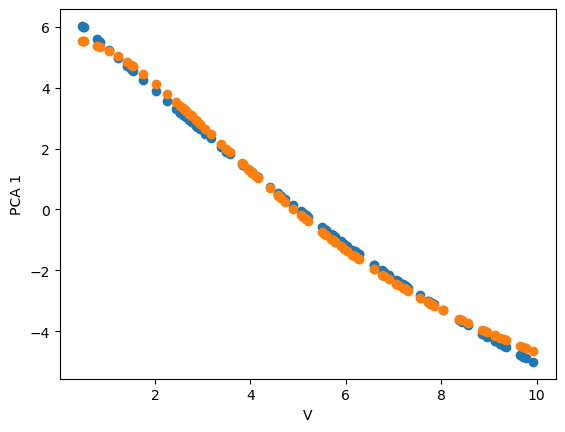

In [27]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train_2d, y_train_1d)
y_train_1d_pred = reg.predict(x_train_2d)

plt.figure()
plt.scatter(V_arr, y_train_1d[:, 0], label='true')
plt.scatter(V_arr, y_train_1d_pred[:, 0], label='predicted')
plt.xlabel('V')
plt.ylabel('PCA 1')

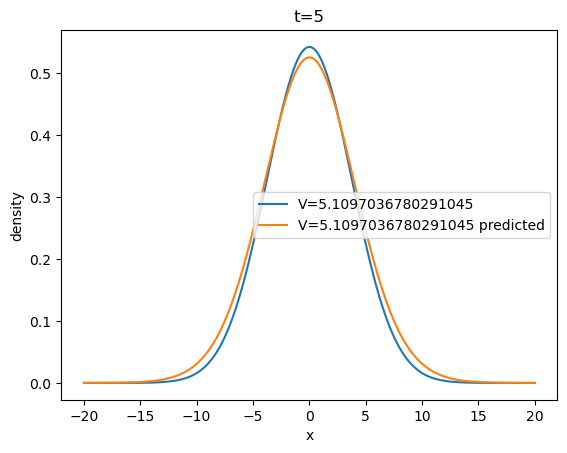

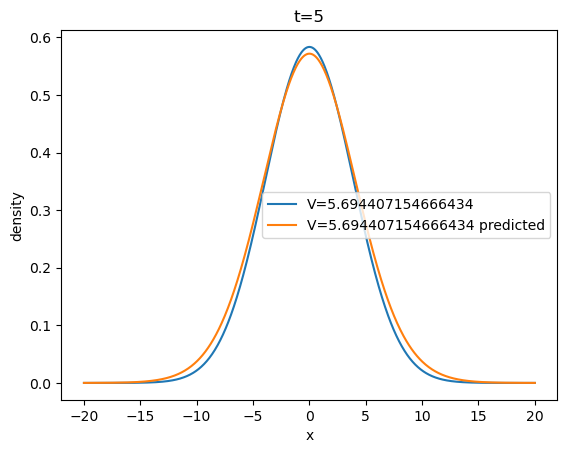

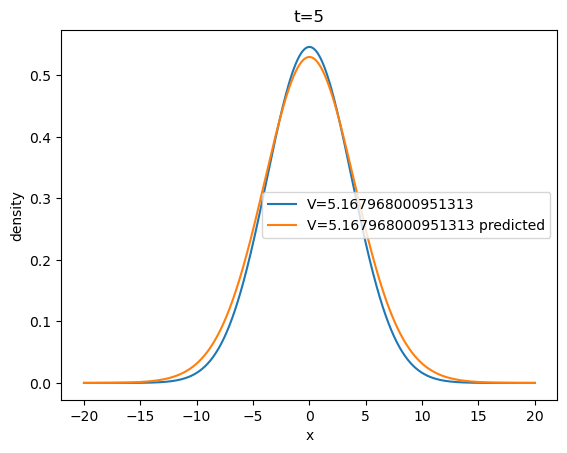

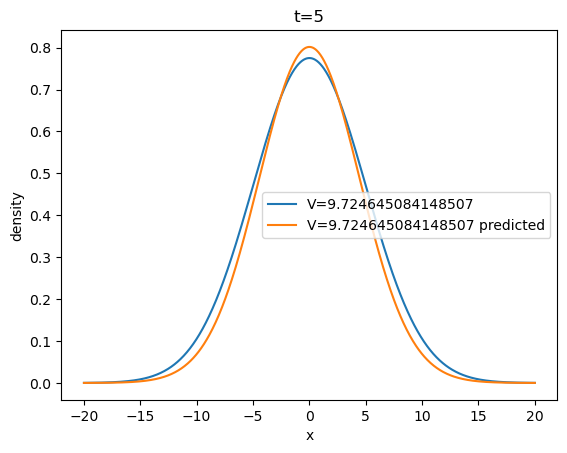

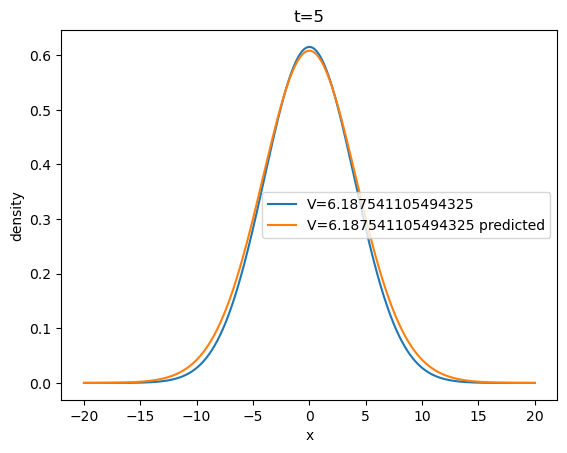

In [31]:
y_train_pred = PCA_model_y_train.inverse_transform(y_train_1d_pred)


for i in range(n_samples_train)[:5]:
    plt.figure()
    plt.plot(x, y_train[i, :], label=f'V={V_arr[i]}')
    plt.plot(x, y_train_pred[i, :], label=f'V={V_arr[i]} predicted')
    plt.xlabel('x')
    plt.ylabel('density')
    plt.title('t=5')
    plt.legend()
    plt.show()
